In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_json('../public/data/CHI_2025_program.json')
data.head()

,id,typeId,title,addons,recognitionIds,isBreak,importedId,source,trackId,tags,keywords,sessionIds,eventIds,abstract,authors,award,durationOverride
0,188208,13945,Like Adding a Small Weight to a Scale About to...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-4096,PCS,13412,[],[],[195157],[],Personalized behavior change interventions can...,"[{'affiliations': [{'country': 'Korea, Republi...",NaN,NaN
1,188209,13945,Developing a Social Support Framework: Underst...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-7364,PCS,13412,[],[],[195020],[],Chatbots are increasingly used to provide soci...,"[{'affiliations': [{'country': 'China', 'state...",HONORABLE_MENTION,NaN
2,188210,13945,Lookee: Gaze Tracking-based Infant Vocabulary ...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-9301,PCS,13412,[],[],[195082],[],Measuring preverbal vocabulary comprehension o...,"[{'affiliations': [{'country': 'Korea, Republi...",NaN,NaN
3,188211,13945,Leveraging Multimodal LLM for Inspirational Us...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-9543,PCS,13412,[],[],[195072],[],"Inspirational search, the process of exploring...","[{'affiliations': [{'country': 'Korea, Republi...",NaN,NaN
4,188212,13945,Why So Serious? Exploring Timely Humorous Comm...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-6276,PCS,13412,[],[],[195098],[],People with disabilities that affect their spe...,[{'affiliations': [{'country': 'United States'...,HONORABLE_MENTION,NaN


In [79]:
data['typeId'].unique()

array([13945, 13948, 14039, 13952, 13940, 13942, 13950, 13956, 13957,
       14040, 13944, 14042, 13954, 13953, 13964, 14041, 13951, 13955,
       13943, 14139])

In [80]:
# data['recognitionIds']
# find data with title include shaping
# data[data['title'].str.contains('Code Shaping')]
# data = data[data['trackId'] == 13412]
# data.shape
# filter data with award not NaN
data = data[data['award'].notna()]
data = data[data['abstract'].notna()]
data = data[data['title'].notna()]
data.shape

(251, 17)

In [81]:
# store data in csv form
data.to_csv('../public/data/CHI_2025_program_cleaned.csv', index=False)

['chatbots', 'increasingly', 'social', 'individuals', 'mental', 'health', 'challenges', 'systematic', 'types', 'directionality']


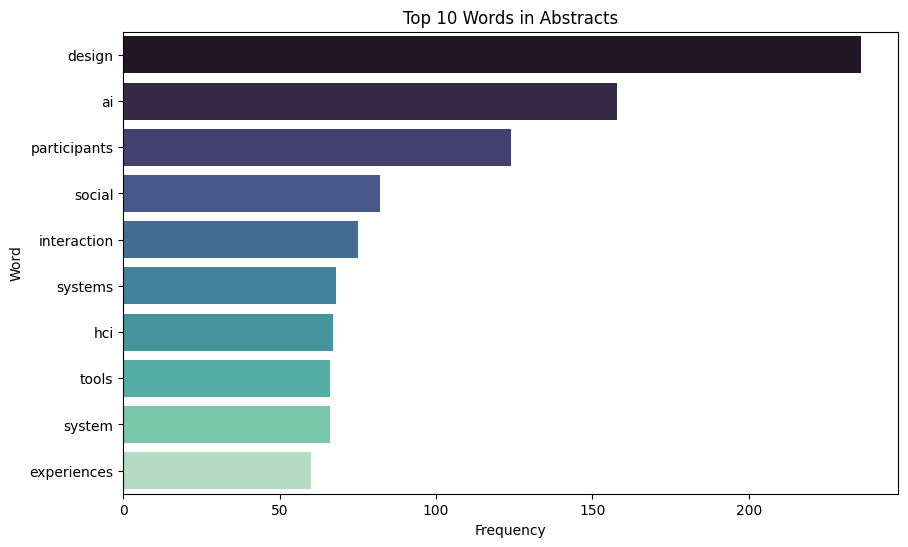

In [31]:
df = pd.read_csv('../public/data/CHI_2025_program_cleaned.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re

# df is CHI_2025_program.json (pre-loaded)
# print(df.head())

def process_text(text):
    stop_words = ['and', 'the', 'to', 'of', 'in', 'a', 'is', 'that', 'for', 'on', 'with', 'as', 'by', 'this', 'we', 'are', 'from', 'our', 'their', 'has', 'had', 'have', 'hasn', 'hadn', 'haven', 'can', 'how', 'can', 'will', 'should', 'would', 'could', 'may', 'might', 'must', 'ought', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them', 'my', 'your', 'his', 'her', 'its', 'our', 'their', 'who', 'whom', 'this', 'that', 'these', 'those', 'my', 'your', 'his', 'her', 'its', 'our', 'their', 'an', 'through', 'into', 'other', 'which', 'you', 'your', 'yours', 'himself', 'herself', 'itself', 'ourselves', 'themselves', 'my', 'your', 'his', 'her', 'its', 'our', 'their', 'who', 'whom', 'this', 'that', 'these', 'those', 'my', 'your', 'his', 'her', 'its', 'our', 'their', 'an', 'through', 'into', 'other', 'which', 'you', 'your', 'yours', 'himself', 'herself', 'itself', 'ourselves', 'themselves', 'or', 'while', 'support', 'findings', 'finding', 'such', 'research', 'work', 'be', 'however', 'more', 'paper', 'user', 'users', 'use', 'but', 'when', 'often', 'also', 'however',
                'data', 'potential', 'based', 'using', 'used', 'also', 'show', 'shows', 'shown', 'found', 'results', 'present', 'presents', 'presented', 'propose', 'proposed', 'approach', 'approaches', 'method', 'methods', 'methodology', 'analysis', 'analyze', 'analyzed', 'study', 'studies', 'examined', 'examine', 'examining', 'investigated', 'investigate', 'investigating', 'explored', 'explore', 'exploring', 'conducted', 'conduct', 'conducting', 'developed', 'develop', 'developing', 'implementation', 'implement', 'implementing', 'different', 'various', 'several', 'many', 'multiple', 'number', 'well', 'new', 'novel', 'current', 'existing', 'previous', 'future', 'first', 'second', 'third', 'one', 'two', 'three', 'way', 'ways', 'make', 'made', 'making', 'provide', 'provides', 'provided', 'providing', 'understanding', 'understand', 'understood', 'need', 'needs', 'needed', 'needing', 'within', 'without', 'across', 'among', 'between', 'each', 'every', 'all', 'both', 'either', 'neither', 'none', 'some', 'any', 'most', 'least', 'much', 'many', 'few', 'several', 'various', 'diverse', 'different']

    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    words = [word for word in text.split() if word not in stop_words and len(word) > 1]
    
    return words

all_words = []
for abstract in df['abstract']:
    all_words.extend(process_text(abstract))
print(all_words[:10])

word_counts = Counter(all_words).most_common(10)
word_df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=word_df, x='Count', y='Word', palette='mako')
plt.title('Top 10 Words in Abstracts')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [6]:

df.columns

Index(['id', 'typeId', 'title', 'addons', 'recognitionIds', 'isBreak',
       'importedId', 'source', 'trackId', 'tags', 'keywords', 'sessionIds',
       'eventIds', 'abstract', 'authors', 'award', 'durationOverride'],
      dtype='object')

In [25]:
import ast
import pandas as pd
import matplotlib.pyplot as plt


df.sample(10)

,id,typeId,title,addons,recognitionIds,isBreak,importedId,source,trackId,tags,keywords,sessionIds,eventIds,abstract,authors,award,durationOverride
175,189234,13945,"""I Need Your Help!"" : Facilitating Psychologic...","{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-6776,PCS,13412,[],[],[195033],[],"In impoverished regions, limited resources, ec...","[{'affiliations': [{'country': 'China', 'state...",HONORABLE_MENTION,NaN
203,189384,13945,ShamAIn: Designing Superior Conversational AI ...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-1148,PCS,13412,[],[],[195129],[],"This paper presents the design process, outcom...","[{'affiliations': [{'country': 'Korea, Republi...",HONORABLE_MENTION,NaN
81,188689,13945,Unpacking Trust Dynamics in the LLM Supply Cha...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-5875,PCS,13412,[],[],[195145],[],Research on trust in AI is limited to several ...,"[{'affiliations': [{'country': 'Netherlands', ...",HONORABLE_MENTION,NaN
100,188835,13945,T2IRay: Design of Thumb-to-Index based Indirec...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-8051,PCS,13412,[],[],[195111],[],Free-hand interactions have been widely deploy...,"[{'affiliations': [{'country': 'Korea, Republi...",HONORABLE_MENTION,NaN
231,189565,13945,IncluSim: An Accessible Educational Electronic...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-8391,PCS,13412,[],[],[191354],[],Electronic circuit simulation is a core skill ...,[{'affiliations': [{'country': 'United States'...,HONORABLE_MENTION,NaN
187,189285,13945,"""Create a Fear of Missing Out"" – ChatGPT Imple...","{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-3010,PCS,13412,[],[],[195112],[],With the recent advancements in Large Language...,"[{'affiliations': [{'country': 'Germany', 'sta...",HONORABLE_MENTION,NaN
99,188801,13945,FamiData Hub: A Speculative Design Exploration...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-2530,PCS,13412,[],[],[195123],[],Smart home technologies are becoming increasin...,[{'affiliations': [{'country': 'United States'...,HONORABLE_MENTION,NaN
22,188372,13945,Layered Interactions: Exploring Non-Intrusive ...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[10114],False,chi25b-9759,PCS,13412,[],[],[195036],[],Integrating technology with the distinctive ch...,"[{'affiliations': [{'country': 'China', 'state...",HONORABLE_MENTION,NaN
164,189190,13945,The Effect of Augmented Reality on Involuntary...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-6563,PCS,13412,[],[],[195164],[],We know little about the impact of augmented r...,"[{'affiliations': [{'country': 'France', 'stat...",HONORABLE_MENTION,NaN
180,189253,13945,GazeSwipe: Enhancing Mobile Touchscreen Reacha...,"{'doi': {'type': 'doiLink', 'url': 'https://dl...",[],False,chi25b-3037,PCS,13412,[],[],[195146],[],Smartphones with large screens provide users w...,"[{'affiliations': [{'country': 'China', 'state...",BEST_PAPER,NaN


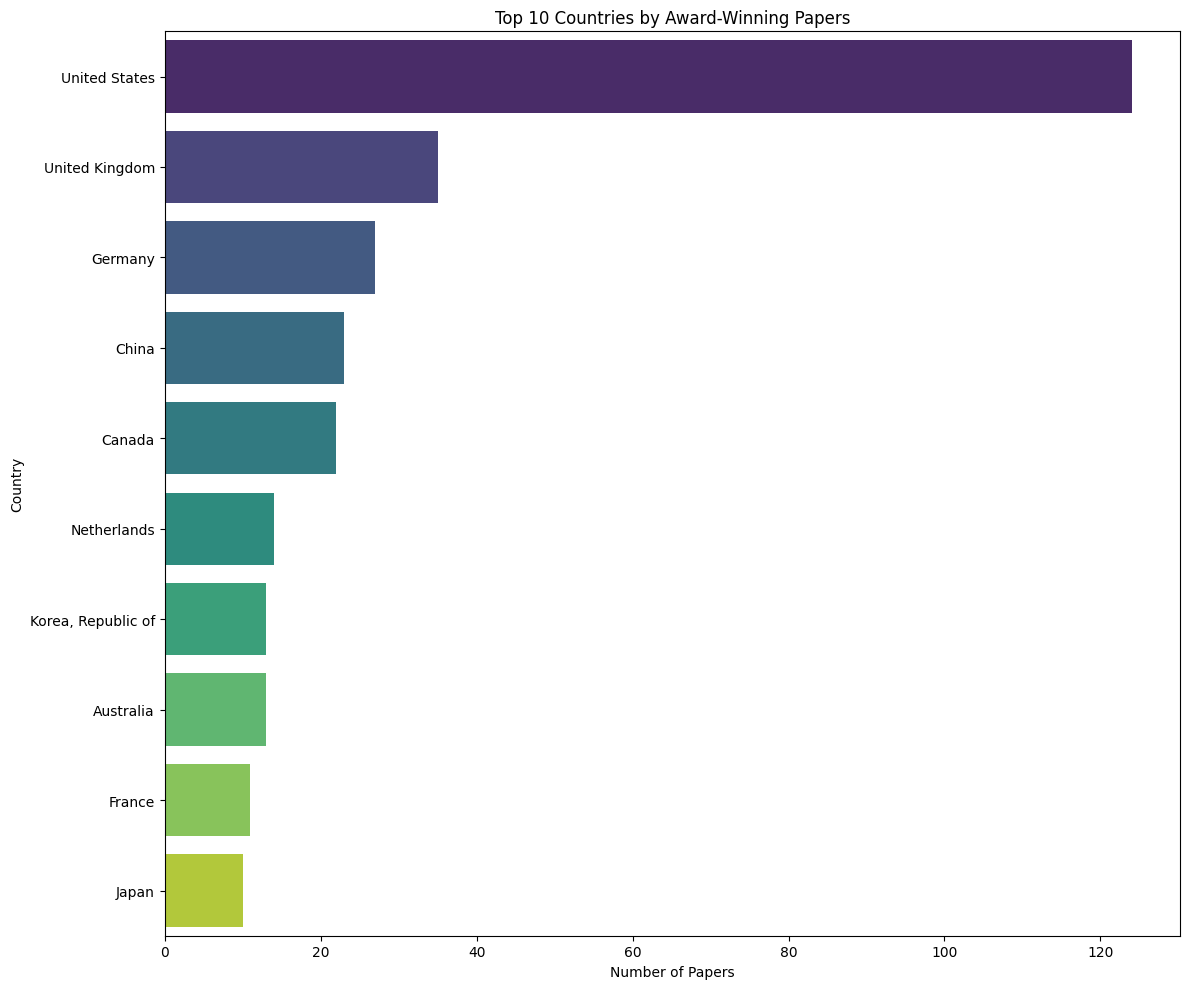

In [20]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

def extract_countries(authors_str):
    try:
        authors = ast.literal_eval(authors_str)
        countries = set()
        for author in authors:
            for aff in author.get('affiliations', []):
                country = aff.get('country')
                if country:
                    countries.add(country)
        return list(countries)
    except (ValueError, SyntaxError):
        return []


df_expanded = df.copy()
df_expanded['Country'] = df_expanded['authors'].apply(extract_countries)
df_expanded = df_expanded.explode('Country').dropna(subset=['Country'])

country_counts = (
    df_expanded
      .groupby('Country')
      .size()
      .reset_index(name='Count')
      .sort_values('Count', ascending=False)
      .head(10)
)

plt.figure(figsize=(12, 10))
sns.barplot(
    data=country_counts,
    y='Country',
    x='Count',
    palette='viridis'
)
plt.title('Top 10 Countries by Award-Winning Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

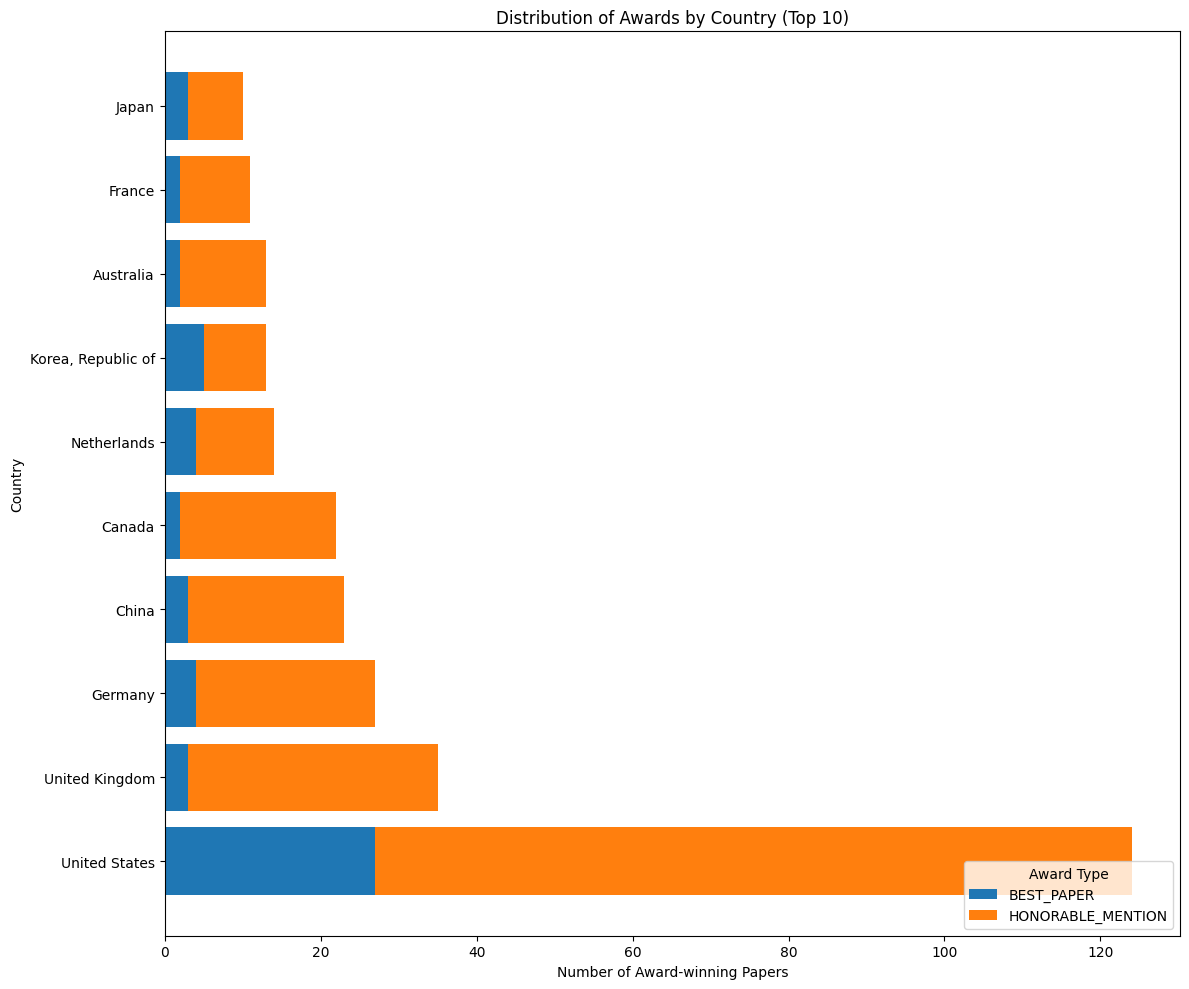

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

def extract_countries(authors_str):
    try:
        authors = ast.literal_eval(authors_str)
        countries = set()
        for author in authors:
            for aff in author.get('affiliations', []):
                country = aff.get('country')
                if country:
                    countries.add(country)
        return list(countries)
    except (ValueError, SyntaxError):
        return []


df_expanded = df.copy()
df_expanded['Country'] = df_expanded['authors'].apply(extract_countries)
df_expanded = df_expanded.explode('Country').dropna(subset=['Country'])

counts = (
    df_expanded
    .groupby(['Country', 'award'])
    .size()
    .reset_index(name='Count')
)

pivot = counts.pivot(index='Country', columns='award', values='Count').fillna(0)

pivot['Total'] = pivot.sum(axis=1)
top10 = pivot.sort_values('Total', ascending=False).head(10).drop(columns='Total')

award_types = top10.columns.tolist()
countries = top10.index.tolist()

fig, ax = plt.subplots(figsize=(12, 10))
left = [0] * len(countries)
for award in award_types:
    values = top10[award].values
    ax.barh(countries, values, left=left, label=award)
    left = [l + v for l, v in zip(left, values)]

ax.set_xlabel('Number of Award-winning Papers')
ax.set_ylabel('Country')
ax.set_title('Distribution of Awards by Country (Top 10)')
ax.legend(title='Award Type', loc='lower right')
plt.tight_layout()
plt.show()

In [85]:
df['authors'].iloc[0]

"[{'affiliations': [{'country': 'China', 'state': '', 'city': 'Shanghai', 'institution': 'Shanghai Jiao Tong University', 'dsl': ''}, {'country': 'Netherlands', 'state': '', 'city': 'Utrecht', 'institution': 'Utrecht University', 'dsl': ''}], 'personId': 183489}, {'affiliations': [{'country': 'Netherlands', 'state': '', 'city': 'Utrecht', 'institution': 'Utrecht University', 'dsl': ''}], 'personId': 185171}]"

[nltk_data] Downloading package punkt_tab to /Users/r4yen/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


(-0.5, 799.5, 399.5, -0.5)

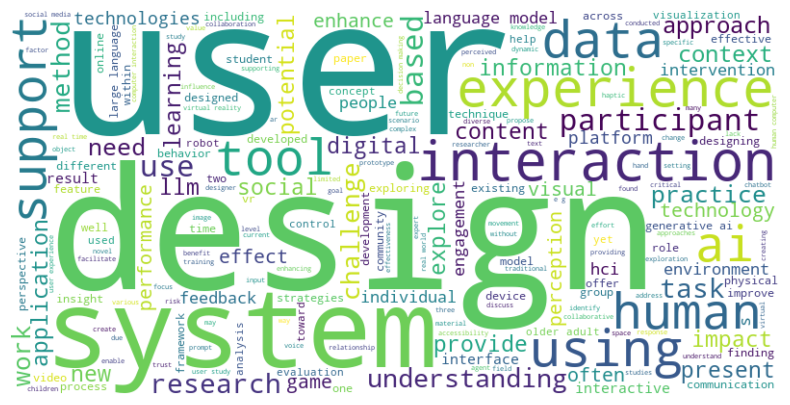

In [15]:
# keyword analysis for all the title and abstract
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


# remove na
data = data[data['title'].notna()]
data = data[data['abstract'].notna()]

# Apply the cleaning function to the title and abstract columns
data['title_tokens'] = data['title'].apply(clean_text)
data['abstract_tokens'] = data['abstract'].apply(clean_text)

# create a word cloud for the title and abstract
from wordcloud import WordCloud

# Combine all tokens into a single list
all_tokens = [token for tokens in data['title_tokens'] + data['abstract_tokens'] for token in tokens]

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

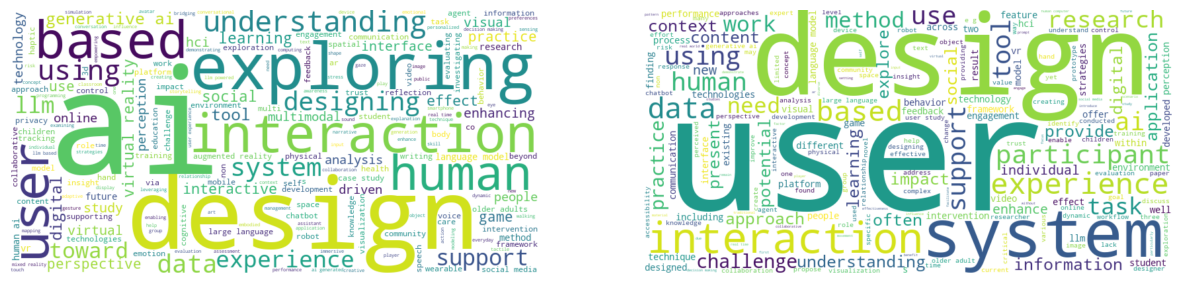

In [11]:
# two word coulds (one for title and one for abstract)
title_tokens = [token for tokens in data['title_tokens'] for token in tokens]
abstract_tokens = [token for tokens in data['abstract_tokens'] for token in tokens]
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(' '.join(title_tokens))
wordcloud_abstract = WordCloud(width=800, height=400, background_color='white').generate(' '.join(abstract_tokens))

# Display the word clouds
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(wordcloud_title, interpolation='bilinear')
axes[0].axis('off')
axes[1].imshow(wordcloud_abstract, interpolation='bilinear')
axes[1].axis('off')
plt.show()


NameError: name 'wordcloud_abstract_with_award' is not defined

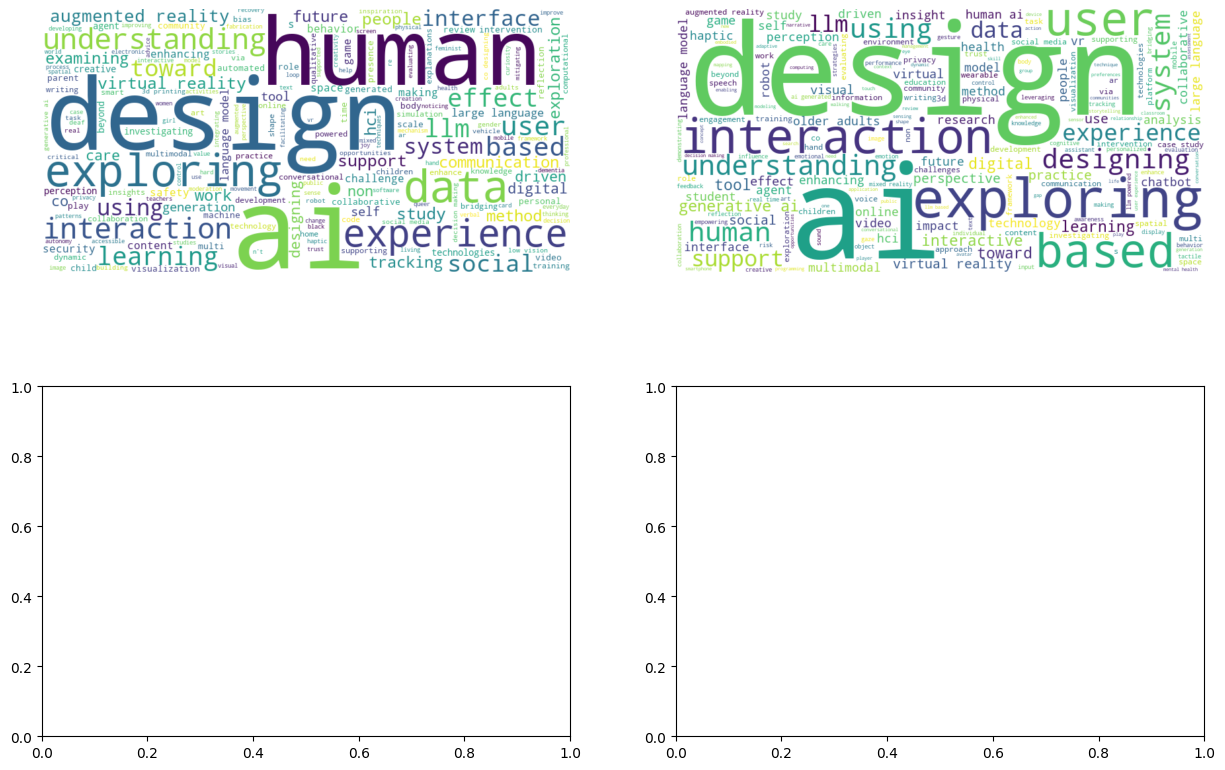

In [18]:
# 4 word clouds (title with award, title without award, abstract with award, abstract without award)
title_tokens_with_award = [token for tokens in data[data['award'].notna()]['title_tokens'] for token in tokens]
title_tokens_without_award = [token for tokens in data[data['award'].isna()]['title_tokens'] for token in tokens]
abstract_tokens_with_award = [token for tokens in data[data['award'].notna()]['abstract_tokens'] for token in tokens]
abstract_tokens_without_award = [token for tokens in data[data['award'].isna()]['abstract_tokens'] for token in tokens]

wordcloud_title_with_award = WordCloud(width=800, height=400, background_color='white').generate(' '.join(title_tokens_with_award))
wordcloud_title_without_award = WordCloud(width=800, height=400, background_color='white').generate(' '.join(title_tokens_without_award))

# plot the 4 word clouds
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].imshow(wordcloud_title_with_award, interpolation='bilinear')
axes[0, 0].axis('off')
axes[0, 1].imshow(wordcloud_title_without_award, interpolation='bilinear')
axes[0, 1].axis('off')
axes[1, 0].imshow(wordcloud_abstract_with_award, interpolation='bilinear')
axes[1, 0].axis('off')
axes[1, 1].imshow(wordcloud_abstract_without_award, interpolation='bilinear')
axes[1, 1].axis('off')
plt.show()



Dataset shape: (2380, 20)

Column types:
id                    int64
typeId                int64
title                object
addons               object
recognitionIds       object
isBreak                bool
importedId           object
source               object
trackId               int64
tags                 object
keywords             object
sessionIds           object
eventIds             object
abstract             object
authors              object
award                object
durationOverride    float64
title_tokens         object
abstract_tokens      object
award_category       object
dtype: object

Missing values per column:
id                     0
typeId                 0
title                  0
addons               138
recognitionIds         0
isBreak                0
importedId             0
source                 0
trackId                0
tags                   0
keywords               0
sessionIds             0
eventIds               0
abstract               0
authors

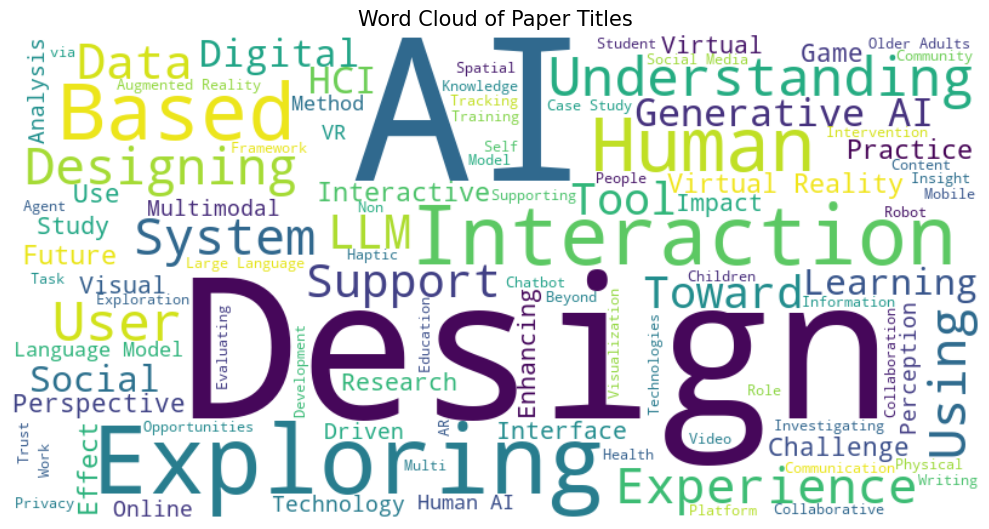

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from typing import List, Dict, Optional

class ConferenceDataExplorer:
    def __init__(self, dataframe: pd.DataFrame):
        self.dataframe = dataframe
        self.fig_size = (10, 6)
        
    def summarize_data(self) -> None:
        """Print basic summary statistics of the dataset"""
        print("Dataset shape:", self.dataframe.shape)
        print("\nColumn types:")
        print(self.dataframe.dtypes)
        print("\nMissing values per column:")
        print(self.dataframe.isna().sum())
        
    def visualize_award_distribution(self, highlight_areas: Optional[List[Dict]] = None) -> None:
        """
        Visualize the distribution of papers with and without awards
        
        Args:
            highlight_areas: List of dictionaries with keys 'rect' (tuple of x, y, width, height) 
                             and 'label' for annotating specific areas
        """
        fig, ax = plt.subplots(figsize=self.fig_size)
        
        # Create award category column
        self.dataframe['award_category'] = self.dataframe['award'].fillna('No Award')
        award_counts = self.dataframe['award_category'].value_counts()
        
        # Plot
        bars = sns.barplot(x=award_counts.index, y=award_counts.values, ax=ax)
        ax.set_title('Distribution of Papers by Award Status', fontsize=15)
        ax.set_xlabel('Award Category', fontsize=12)
        ax.set_ylabel('Number of Papers', fontsize=12)
        
        # Add value labels on top of bars
        for i, count in enumerate(award_counts.values):
            ax.text(i, count + 0.1, str(count), ha='center', fontsize=10)
        
        # Add highlight areas if provided
        if highlight_areas:
            for area in highlight_areas:
                rect = Rectangle(area['rect'][0:2], area['rect'][2], area['rect'][3], 
                                 linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                ax.annotate(area['label'], 
                           xy=(area['rect'][0] + area['rect'][2]/2, 
                               area['rect'][1] + area['rect'][3] + 0.2),
                           ha='center', fontsize=12, color='red')
        
        plt.tight_layout()
        plt.show()
        
    def visualize_track_distribution(self, annotations: Optional[List[Dict]] = None) -> None:
        """
        Visualize the distribution of papers across tracks
        
        Args:
            annotations: List of dictionaries with keys 'xy' (tuple of x, y coordinates) 
                        and 'text' for adding annotations
        """
        fig, ax = plt.subplots(figsize=self.fig_size)
        
        track_counts = self.dataframe['trackId'].value_counts().sort_values(ascending=False)
        
        # Plot
        plt.pie(track_counts, labels=track_counts.index, autopct='%1.1f%%',
                shadow=True, startangle=90, explode=[0.05]*len(track_counts))
        plt.axis('equal')
        plt.title('Distribution of Papers by Track', fontsize=15)
        
        # Add annotations if provided
        if annotations:
            for anno in annotations:
                ax.annotate(anno['text'], xy=anno['xy'], 
                           xytext=(anno['xy'][0] + 0.2, anno['xy'][1] + 0.2),
                           arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                           fontsize=12, color='blue')
        
        plt.tight_layout()
        plt.show()
        
    def explore_title_wordcloud(self, highlighted_words: Optional[List[str]] = None) -> None:
        """
        Generate a word cloud from paper titles with option to highlight specific words
        
        Args:
            highlighted_words: List of words to highlight in the wordcloud
        """
        from wordcloud import WordCloud
        
        titles = ' '.join(self.dataframe['title'].fillna(''))
        
        wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(titles)
        
        plt.figure(figsize=self.fig_size)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Paper Titles', fontsize=15)
        
        # Highlight specific words if provided
        if highlighted_words:
            for word in highlighted_words:
                plt.text(0.5, 0.95, f"Highlighted: {', '.join(highlighted_words)}", 
                         transform=plt.gca().transAxes, ha='center', 
                         bbox=dict(facecolor='yellow', alpha=0.5))
        
        plt.tight_layout()
        plt.show()

# Example usage
explorer = ConferenceDataExplorer(data)
explorer.summarize_data()

# With annotations
# explorer.visualize_award_distribution(highlight_areas=[
#     {'rect': (0, 0, 0.5, 5), 'label': 'Interesting pattern here!'}
# ])

# explorer.visualize_track_distribution(annotations=[
#     {'xy': (0.5, 0.5), 'text': 'Most popular track'}
# ])

explorer.explore_title_wordcloud()

JSONDecodeError: Expecting ',' delimiter: line 1 column 3652 (char 3651)